# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model1 = Sequential()
model2 = Sequential()

In [0]:
#建立模型

In [9]:
model1.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model1.add(Dense(units=128, 
                #input_dim=256, 
                kernel_initializer='normal', 
                activation='relu'))
model1.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model1.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model2.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#增加一兩層
model2.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

model2.add(Dense(units=32, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model2.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history1 =model1.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.2555 - acc: 0.9254 - val_loss: 0.1151 - val_acc: 0.9663
Epoch 2/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.0981 - acc: 0.9697 - val_loss: 0.0934 - val_acc: 0.9717
Epoch 3/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.0639 - acc: 0.9798 - val_loss: 0.0907 - val_acc: 0.9725
Epoch 4/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.0465 - acc: 0.9848 - val_loss: 0.0890 - val_acc: 0.9743
Epoch 5/10
48000/48000 [==============================] - 8s 173us/step - loss: 0.0368 - acc: 0.9879 - val_loss: 0.0924 - val_acc: 0.9748
Epoch 6/10
48000/48000 [==============================] - 8s 173us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0950 - val_acc: 0.9759
Epoch 7/10
48000/48000 [=

In [12]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history2 =model2.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.3173 - acc: 0.9043 - val_loss: 0.1636 - val_acc: 0.9497
Epoch 2/10
48000/48000 [==============================] - 9s 190us/step - loss: 0.1161 - acc: 0.9656 - val_loss: 0.1333 - val_acc: 0.9617
Epoch 3/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.0767 - acc: 0.9761 - val_loss: 0.1019 - val_acc: 0.9696
Epoch 4/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0570 - acc: 0.9821 - val_loss: 0.0855 - val_acc: 0.9749
Epoch 5/10
48000/48000 [==============================] - 9s 188us/step - loss: 0.0441 - acc: 0.9858 - val_loss: 0.1054 - val_acc: 0.9722
Epoch 6/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.0366 - acc: 0.9881 - val_loss: 0.0889 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 9s 190us/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.1196 - 

# 以圖形顯示訓練過程

In [0]:
#train_history1

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history1,train,validation):
    plt.plot(train_history1.history[train])
    plt.plot(train_history1.history[validation])
    plt.title('Train History1')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

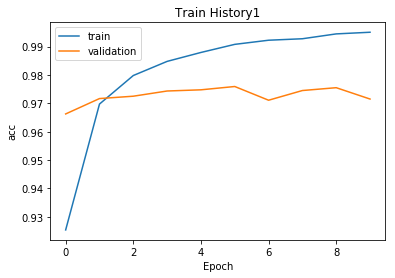

In [14]:
show_train_history(train_history1,'acc','val_acc')

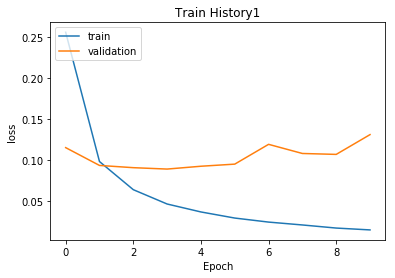

In [15]:
show_train_history(train_history1,'loss','val_loss')

In [0]:
#train_history2

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history2,train,validation):
    plt.plot(train_history2.history[train])
    plt.plot(train_history2.history[validation])
    plt.title('Train History2')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

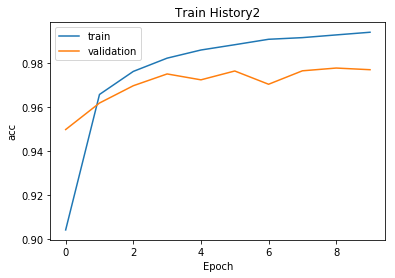

In [18]:
show_train_history(train_history2,'acc','val_acc')

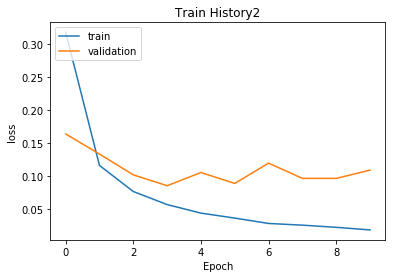

In [19]:
show_train_history(train_history2,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model1.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 52us/step

accuracy= 0.9739


In [21]:
scores = model2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 53us/step

accuracy= 0.9765
